In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import pi
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [45]:
filename = r'C:\Users\matheus.santos\Downloads\HIST_PAINEL_COVIDBR_21jun2020.xlsx'
df = pd.read_excel(filename)

In [46]:
df.shape

(436129, 16)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436129 entries, 0 to 436128
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   regiao                 436129 non-null  object        
 1   estado                 436011 non-null  object        
 2   municipio              430998 non-null  object        
 3   coduf                  436129 non-null  int64         
 4   codmun                 432825 non-null  float64       
 5   codRegiaoSaude         430998 non-null  float64       
 6   nomeRegiaoSaude        430998 non-null  object        
 7   data                   436129 non-null  datetime64[ns]
 8   semanaEpi              436129 non-null  int64         
 9   populacaoTCU2019       434302 non-null  object        
 10  casosAcumulado         436129 non-null  int64         
 11  casosNovos             436129 non-null  int64         
 12  obitosAcumulado        436129 non-null  int6

In [48]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
175117,Nordeste,BA,Lajedão,29,291890.0,29026.0,TEIXEIRA DE FREITAS,2020-06-10,24,3955,3,2,0,0,NaN,NaN
235561,Sudeste,MG,Santana da Vargem,31,315830.0,31011.0,TRES PONTAS,2020-05-20,21,7100,0,0,0,0,NaN,NaN
82291,Nordeste,CE,Granjeiro,23,230480.0,23021.0,21ª REGIAO JUAZEIRO DO NORTE,2020-06-13,24,4844,0,0,0,0,NaN,NaN
269127,Sudeste,SP,Cabreúva,35,350840.0,35073.0,JUNDIAI,2020-05-04,19,49707,4,0,0,0,NaN,NaN
245336,Sudeste,MG,Varzelândia,31,317090.0,31049.0,BRASILIA DE MINAS/SAO FRANCISCO,2020-06-20,25,19320,7,-3,1,0,NaN,NaN
35853,Norte,TO,Marianópolis do Tocantins,17,171250.0,17007.0,CANTAO,2020-04-07,15,5175,0,0,0,0,NaN,NaN
38302,Norte,TO,Presidente Kennedy,17,171840.0,17004.0,CERRADO TOCANTINS ARAGUAIA,2020-04-20,17,3684,0,0,0,0,NaN,NaN
243718,Sudeste,MG,Três Corações,31,316930.0,31010.0,TRES CORACOES,2020-04-29,18,79482,3,2,0,0,NaN,NaN
115769,Nordeste,PB,Lagoa de Dentro,25,250820.0,25002.0,2ª REGIAO,2020-05-27,22,7719,6,1,0,0,NaN,NaN
316120,Sul,PR,Assis Chateaubriand,41,410200.0,41020.0,20ª RS TOLEDO,2020-05-17,21,33362,22,0,0,0,NaN,NaN


In [49]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos'],
      dtype='object')

In [50]:
df.tail(12)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
436117,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-10,24,3015268,19433,1343,256,20,NaN,NaN
436118,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-11,24,3015268,20507,1074,274,18,NaN,NaN
436119,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-12,24,3015268,21396,889,282,8,NaN,NaN
436120,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-13,24,3015268,21959,563,293,11,NaN,NaN
436121,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-14,25,3015268,22871,912,304,11,NaN,NaN
436122,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-15,25,3015268,23684,813,319,15,NaN,NaN
436123,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-16,25,3015268,25380,1696,348,29,NaN,NaN
436124,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-17,25,3015268,27140,1760,365,17,NaN,NaN
436125,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-18,25,3015268,28521,1381,379,14,NaN,NaN
436126,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-19,25,3015268,30902,2381,396,17,NaN,NaN


In [51]:
df.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
count,436129.000000,432825.000000,430998.000000,436129.000000,4.361290e+05,436129.000000,436129.000000,436129.000000,64.000000,64.000000
mean,31.930757,320885.186332,31973.155632,19.408519,1.774023e+02,7.463650,9.816953,0.348179,173223.000000,201870.468750
std,9.913229,98799.263547,9859.597287,3.616043,6.485912e+03,252.262903,350.621561,11.025522,150328.199154,156970.419028
min,11.000000,110000.000000,11001.000000,9.000000,0.000000e+00,-1370.000000,0.000000,-36.000000,22130.000000,14062.000000
25%,25.000000,250407.000000,25004.000000,16.000000,0.000000e+00,0.000000,0.000000,0.000000,47462.250000,57748.000000
50%,31.000000,313820.000000,31048.000000,19.000000,1.000000e+00,0.000000,0.000000,0.000000,121321.500000,160058.500000
75%,41.000000,411320.000000,41011.000000,23.000000,9.000000e+00,0.000000,0.000000,0.000000,269492.250000,347795.500000
max,76.000000,530010.000000,53001.000000,26.000000,1.085038e+06,54771.000000,50617.000000,1473.000000,549386.000000,496869.000000


In [63]:
df.groupby(['estado'])['data', 'casosAcumulado', 'obitosAcumulado'].sum()

C:\Users\matheus.santos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,casosAcumulado,obitosAcumulado
estado,,
AC,545602,14459
AL,1087962,42674
AM,3632766,190211
AP,939066,20462
BA,2038823,65175
CE,4778789,304589
DF,1203484,17384
ES,1514225,61199
GO,486848,13933


Text(0.5, 1.0, 'Porcentagem de casos de COVID-19 por estado')

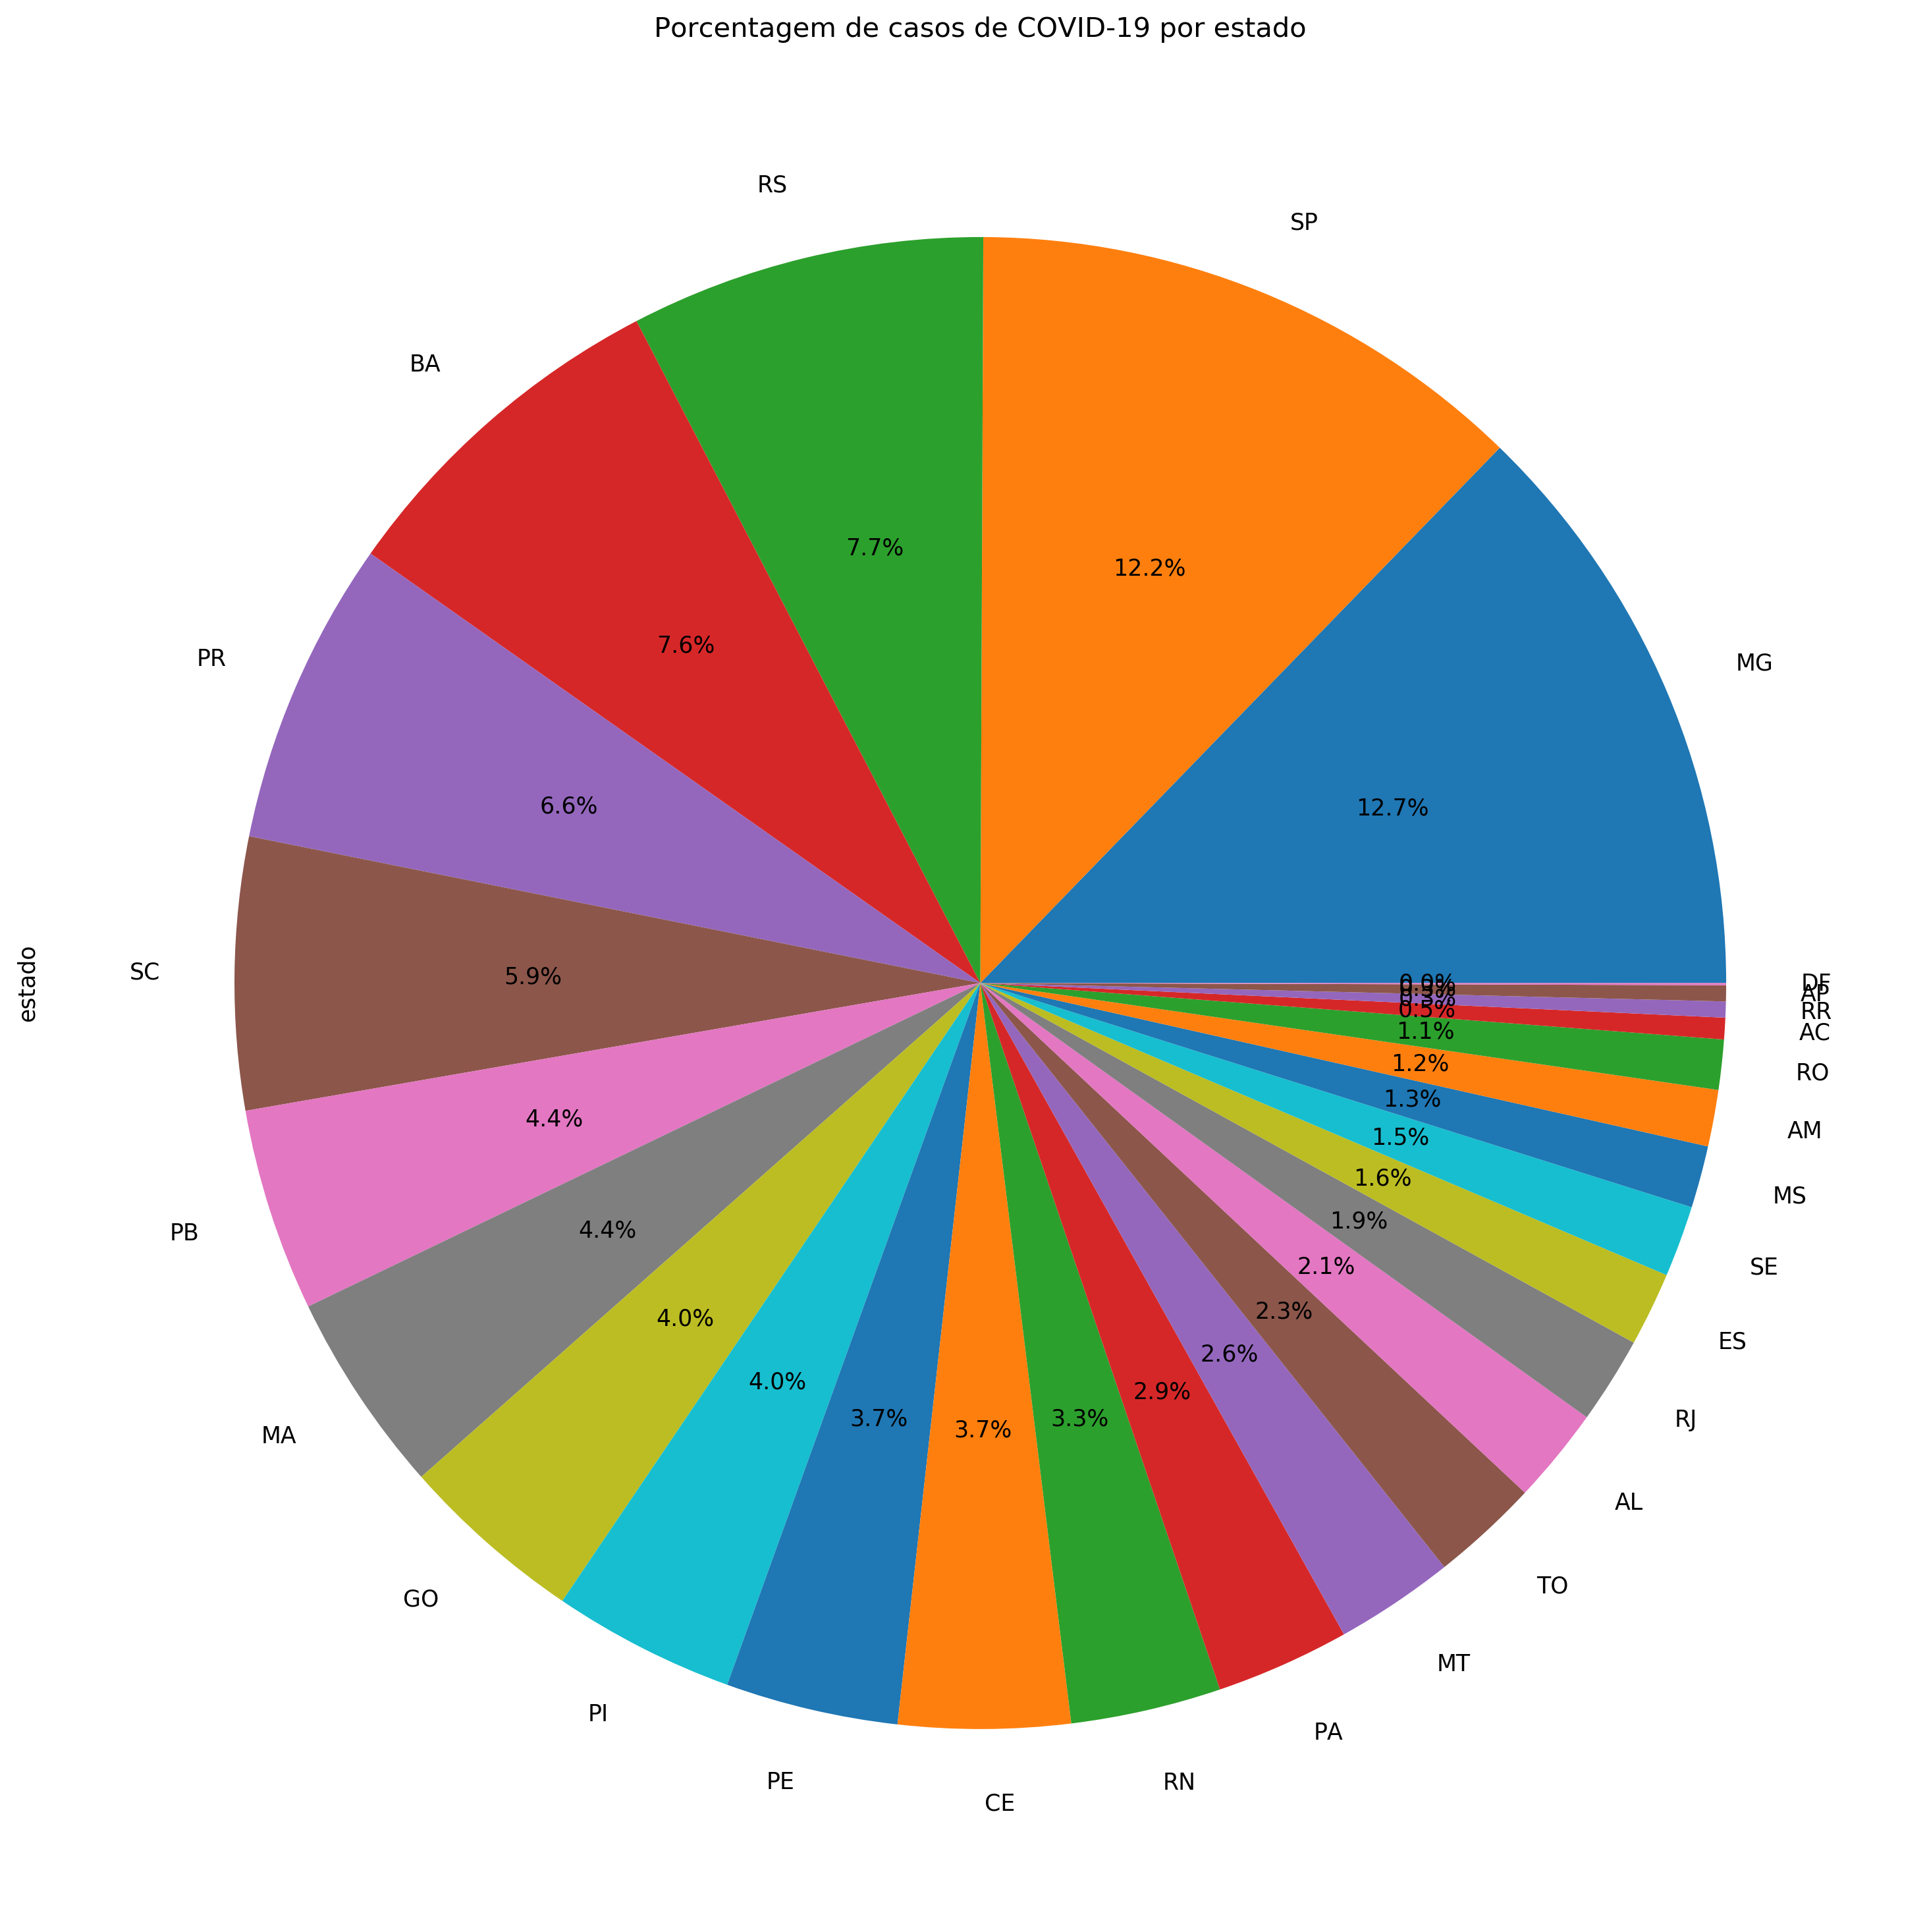

In [53]:
plt.figure(figsize = (20,15), dpi =250)
df['estado'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Porcentagem de casos de COVID-19 por estado') 
